In [1]:
import numpy as np
import matplotlib.pyplot as plt

We will create a vector Y and also create a data matrix X and using the results of OLS we will compute the  beta coefficients for a regression model $Y = b_0+b_1x_1$

In [2]:
import pandas as pd
from pandas import DataFrame, Series

In [3]:
data=pd.read_csv('E:\\Work\\Machine Learning Course\\Python\\Module 2 Linear Regression\\Data\\regression.csv')

In [4]:
data.columns
%matplotlib inline

In [5]:
print(data.head())

         x1        x2          y
0 -0.635764  0.241162 -32.718033
1  0.644243  0.425391  59.923622
2 -0.407295  0.865839   7.470409
3 -0.551043  1.673688  30.181461
4  1.354318 -0.459583  71.860641


In [6]:
Y=data.y

In [7]:
data['Ones']=np.repeat(1,data.shape[0])

In [8]:
print(data.head())

         x1        x2          y  Ones
0 -0.635764  0.241162 -32.718033     1
1  0.644243  0.425391  59.923622     1
2 -0.407295  0.865839   7.470409     1
3 -0.551043  1.673688  30.181461     1
4  1.354318 -0.459583  71.860641     1


In [10]:
X=data[['Ones','x1']]

We are fitting a model, $Sales=b_0+b_1Tv+b_2Radio+b_3Newspaper$

In [11]:
print(X.head())

   Ones        x1
0     1 -0.635764
1     1  0.644243
2     1 -0.407295
3     1 -0.551043
4     1  1.354318


In [12]:
print(Y.head())

0   -32.718033
1    59.923622
2     7.470409
3    30.181461
4    71.860641
Name: y, dtype: float64


$Hessian=(X^TX)^-1$

In [13]:
Hessian=np.linalg.inv(np.matmul(X.T,X))

$x=X^TY$

In [14]:
x=np.matmul(X.T,Y)

$\hat{\beta}=Hessian \times x$

In [15]:
beta=np.matmul(Hessian,x)

In [16]:
beta

array([ -1.06851916,  65.04668995])

We can get the predictions by computing the $\hat{y}$ from the computed $\hat{\beta}$ and $X$

In [17]:
Y_hat=np.matmul(X,beta)

RSS can be computed as $(\hat{y}-Y)^2$

In [18]:
RSS=np.sum((Y_hat-Y)**2)

In [19]:
RSS

1472501.4756470234

Every time we might not want to compute the $\beta$ vector using first principles, there  are python libraries such as scikitlearn that help us in estimating $\beta$ vector

In [20]:
import sklearn.linear_model as linear_model

In [21]:
reg=linear_model.LinearRegression(fit_intercept=True)

In [22]:
reg=reg.fit(X.drop('Ones',axis=1),Y)

In [23]:
print(reg.coef_)

[ 65.04668995]


In [24]:
print([reg.intercept_])

[-1.0685191599872255]


We will impliment gradient descent to minimize our cost function $RSS(\beta)$. Let us list down the steps:
1. Decide on the learning rate,lets call it $\eta$, keep it small $10^-3 to 10^-6$
2. Compute the gradient of $RSS(\beta)$, this will equal $-2X^T(y-X\beta) = -2X^T(y-\hat{y})=-2X^T(Error)$
3. Compute the differntial in $\beta$ as $\delta\beta= -\eta (2X^T(Error))$
4. Update $\beta$ as $\beta_{new}=\beta_{old}+\delta\beta$
4. Keep on doing this until n_iters are exhausted or difference between succesive costs is less than some level of tolerance

In [25]:
def gradientDescent(X,y,n_iter,eta=0.001):
    beta=np.ones(X.shape[1])
    cost_history=[]
    converged=False
    for i in range(n_iter):
        if converged==True:
            break
        y_hat=np.matmul(X,beta)
        Error=y-y_hat
        J=np.sum(Error**2)
        Gradient=-2*np.matmul(X.T,Error)
        beta=beta-eta*Gradient# Beta update
        cost_history.append(J)
        if i>1:
            if abs(cost_history[i]-cost_history[i-1])<=0.0003:
                converged=True
    print(converged)
    plt.plot(np.arange(i),np.array(cost_history),'-r')
    plt.ylim(ymin=0,ymax=1000)
    print("cost in %sth iteration is %f"%(i+1,J))
    print("cost in 1st iteration is %f"%cost_history[0])
    return beta
    

True
cost in 39234th iteration is 1472502.238479
cost in 1st iteration is 5541205.077211


array([ -1.06259162,  65.01946737])

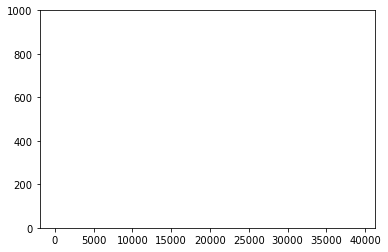

In [26]:
gradientDescent(X,y=Y,n_iter=100000,eta=0.0000001)

Let's impliment a very naive version of Stochastic Gradient Descent, here again the aim is to minimize $RSS(\beta)$
1. Decide on the learning rate, $\eta$ and also decide on the number of epochs or iterations
2. In each iteration compute $\beta$, $\delta\beta$ and the $\bigtriangledown RSS(\beta)$
3. Stop when the number of iterations exhaust or convergence is reached

In [27]:
def sgd(d,n_iter,eta,s):
    beta=np.ones(d.shape[1]-1)
    cost_history=[]
    for i in range(n_iter):
        Data_Sample=d.sample(frac=s)
        y=Data_Sample['Y']
        x=Data_Sample.drop('Y',axis=1)
        y_hat=np.matmul(x,beta)
        Error=y-y_hat
        J=np.sum(Error**2)
        Gradient=-2*np.matmul(x.T,Error)
        beta=beta-eta*Gradient
        cost_history.append(J)
    plt.plot(np.arange(n_iter),np.array(cost_history),'-r')
    plt.ylim(ymin=0,ymax=1000)
    print("cost in %sth iteration is %f"%(i+1,J))
    print("cost in 1st iteration is %f"%cost_history[0])
    return beta

In [30]:
X_d=X.copy()
X_d['Y']=Y

cost in 100000th iteration is 870684.406846
cost in 1st iteration is 3363550.340009


array([ -1.04794857,  65.03263145])

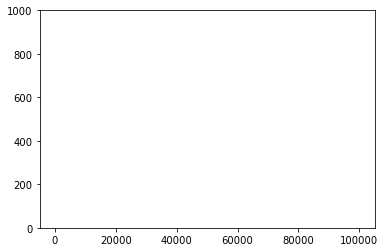

In [31]:
sgd(d=X_d,n_iter=100000,eta=0.0000001,s=0.6)